<a href="https://colab.research.google.com/github/HimanshuSahoo/DATA-SCIENCE/blob/main/MyFeatureExt_Textmining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bag of words

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [ ]:
corpus = [
     'The car is driven on the road',
     'The truck is driven on the highway',     
 ]

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[1 1 1 1 0 1 1 1 1 1 2 1 0 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 2 0 1 0 1 1 1]]


In [ ]:
vocab = vectorizer.vocabulary_
vocab

{'the': 10,
 'car': 0,
 'is': 5,
 'driven': 2,
 'on': 7,
 'road': 9,
 'the car': 11,
 'car is': 1,
 'is driven': 6,
 'driven on': 3,
 'on the': 8,
 'the road': 13,
 'truck': 15,
 'highway': 4,
 'the truck': 14,
 'truck is': 16,
 'the highway': 12}

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(corpus) 
pd.DataFrame(tfidf.toarray())
#vectorizer.vocabulary_

,0,1,2,3,4,5,6,7
0,0.424717,0.30219,0.000000,0.30219,0.30219,0.424717,0.60438,0.000000
1,0.000000,0.30219,0.424717,0.30219,0.30219,0.000000,0.60438,0.424717


## Log(IDF)

In [ ]:
vectorizer = TfidfVectorizer()
model = vectorizer.fit(corpus) 
dictionary = dict( zip( model.get_feature_names(), list(np.log(model.idf_))))
for sent in corpus:
    for word in sent.split(): 
        tf_idf = dictionary[word.lower()]*(sent.count(word)/len(sent.split()))
        print(word+" ----> " +str(tf_idf))

The ----> 0.0
car ----> 0.04862404082917019
is ----> 0.0
driven ----> 0.0
on ----> 0.0
the ----> 0.0
road ----> 0.04862404082917019
The ----> 0.0
truck ----> 0.04862404082917019
is ----> 0.0
driven ----> 0.0
on ----> 0.0
the ----> 0.0
highway ----> 0.04862404082917019


# Simple Classifier

In [ ]:
# Perform imports and load the dataset

df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


### Check for missing values:

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Split the data into train & test sets:

In [ ]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y_train

3235    ham
945     ham
5319    ham
5528    ham
247     ham
       ... 
3772    ham
5191    ham
5226    ham
5390    ham
860     ham
Name: label, Length: 3733, dtype: object

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#count_vect = CountVectorizer()

#X_train_counts = count_vect.fit_transform(X_train)

In [ ]:
#X_train_counts

In [ ]:
#X_train_counts.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

## Train a Classifier

## Model 1 - Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [ ]:
# Form a prediction set
predictions = clf.predict(X_train_tfidf)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
#train_predict = pd.DataFrame({'message': X_train.values,'train_y':y_train.values,'train_preds':predictions[1]})
#train_predict

In [ ]:
#train_predict[train_predict['train_preds']=='spam']

## Build a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
type(X_train), type(y_train)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
X_train.shape

(3733,)

## Test the classifier and display results

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037


In [ ]:
#predictions

## Model 2 Random Forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier



# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('rf', RandomForestClassifier(n_estimators=100)),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

## Test the classifier and display results

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test, predictions))

0.9793365959760739


In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1593    0]
 [  38  208]]


## Word Cloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
# Returns a string
dataset = open("../data/modi.txt", "r").read()
dataset = dataset.lower()

In [ ]:
maskArray = np.array(Image.open("../data/modi.png"))
cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))

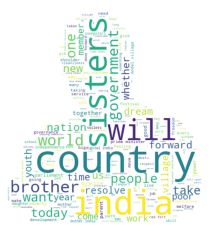

In [ ]:
#cloud = WordCloud(background_color = "black", max_words = 100,  stopwords = set(STOPWORDS))
cloud.generate(dataset)
#cloud.to_file("wordCloud.png")
plt.axis("off")
plt.imshow(cloud)
#plt.show()